# Defect Prediction

In [ ]:
#### Importing Libraries;

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier
#import lightgbm as lgb
from sklearn.metrics import classification_report
import sklearn
from sklearn import svm

#### System Paths & Data Import

In [2]:
df_link = (r'C:\Users\gokal\OneDrive\Masaüstü\swe523_datasets.txt')
df = pd.read_csv(df_link, delimiter=",",header=None)

In [3]:
features = ["loc","v_g","ev_g","iv_g","n","v","l","d","i","e","b","t","lOCode","lOComment","lOBlank","lOCodeAndComment","uniq_Op","uniq_Opnd","total_Op","total_Opnd","branchCount","defects"]

In [4]:
df.columns=features

#### Creating Helper Functions 

In [5]:
def infoDF(df):
    print(df.head())
    print(df.info())
    print(df.describe())
    
def typeDF(df):
    print(df.shape)
    print(df.dtypes)    

def isNULL(df):
    print(df.isna().any().sum())
    print(df.isna().any(axis=1).sum())
    
def tableMissing(df):
    print('TotaL # of NA values in every column')
    #print(df.isnull().sum())   
    for col in df:
        count_nan = len(df[col]) - df[col].count()
        print(str(col) + ': ' + str(count_nan))        
           

#### Initial Data Information & Examination

In [6]:
infoDF(df)

     loc  v_g  ev_g  iv_g      n        v     l      d       i         e  ...  \
0    1.1  1.4   1.4   1.4    1.3     1.30  1.30   1.30    1.30      1.30  ...   
1    1.0  1.0   1.0   1.0    1.0     1.00  1.00   1.00    1.00      1.00  ...   
2   72.0  7.0   1.0   6.0  198.0  1134.13  0.05  20.31   55.85  23029.10  ...   
3  190.0  3.0   1.0   3.0  600.0  4348.76  0.06  17.06  254.87  74202.67  ...   
4   37.0  4.0   1.0   4.0  126.0   599.12  0.06  17.19   34.86  10297.30  ...   

   lOCode  lOComment  lOBlank  lOCodeAndComment  uniq_Op  uniq_Opnd total_Op  \
0       2          2        2                 2      1.2        1.2      1.2   
1       1          1        1                 1        1          1        1   
2      51         10        8                 1       17         36      112   
3     129         29       28                 2       17        135      329   
4      28          1        6                 0       11         16       76   

  total_Opnd branchCount defects

In [7]:
isNULL(df)    

0
0


In [8]:
tableMissing(df)

TotaL # of NA values in every column
loc: 0
v_g: 0
ev_g: 0
iv_g: 0
n: 0
v: 0
l: 0
d: 0
i: 0
e: 0
b: 0
t: 0
lOCode: 0
lOComment: 0
lOBlank: 0
lOCodeAndComment: 0
uniq_Op: 0
uniq_Opnd: 0
total_Op: 0
total_Opnd: 0
branchCount: 0
defects: 0


In [9]:
print("defect ratio:",df.defects.sum()/df.shape[0])

defect ratio: 0.1934772622875517


## Preprocessing
Currently selected variables need no preprocessing.

#### Train & Test Split

In [10]:
predictors = features[:-1]

In [11]:
# Drop unused predictors
# predictors = predictors[:-5]
# Selected predictors:
predictors = ["loc","v_g","lOCode","lOComment","lOBlank","lOCodeAndComment"]

In [12]:
response = features[-1]

In [13]:
X = df[predictors]

In [14]:
y = df[response]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=42)

### Testing Model Performances

#### DecisionTreeClassifier

In [79]:
X_train.head()

,loc,v_g,lOCode,lOComment,lOBlank,lOCodeAndComment
10377,11.0,3.0,6,0,2,0
2815,128.0,2.0,102,3,21,0
8694,13.0,3.0,8,1,1,0
9025,4.0,1.0,0,0,0,0
1543,102.0,34.0,74,19,5,2


DecisionTree
[[1558  200]
 [ 281  138]]


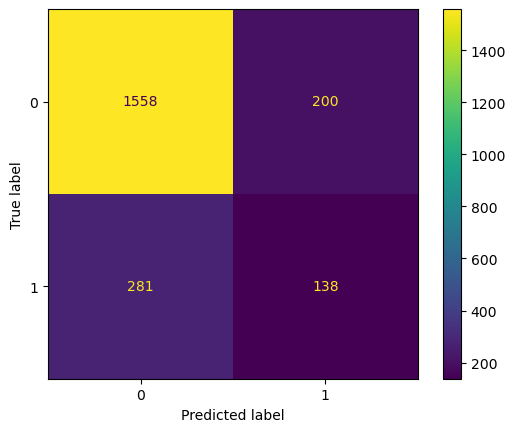

Accuracy: 0.7790537436839687
F1 0.3645970937912813
              precision    recall  f1-score   support

       False       0.85      0.89      0.87      1758
        True       0.41      0.33      0.36       419

    accuracy                           0.78      2177
   macro avg       0.63      0.61      0.62      2177
weighted avg       0.76      0.78      0.77      2177

False    1758
True      419
Name: defects, dtype: int64
False    1839
True      338
dtype: int64


In [27]:
DT = DecisionTreeClassifier()
DT = DT.fit(X_train, y_train)
DT_model = DT.predict(X_test)
Y_DT = pd.DataFrame(DT_model, index = X_test.index)

print("DecisionTree")
print(confusion_matrix(y_test, Y_DT))
#fig, ax = plt.subplots(figsize=(8, 5))
cmp = ConfusionMatrixDisplay(confusion_matrix(y_test, Y_DT))
cmp.plot()
#cmp.plot(ax=ax)
plt.show();
print("Accuracy:",accuracy_score(y_test, Y_DT))
print("F1",f1_score(y_test,Y_DT,pos_label=True))
print(classification_report(y_test, Y_DT))
print(y_test.value_counts())
print(Y_DT.value_counts())

#### KNeighborsClassifier

Kneighbors
[[1689   69]
 [ 368   51]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


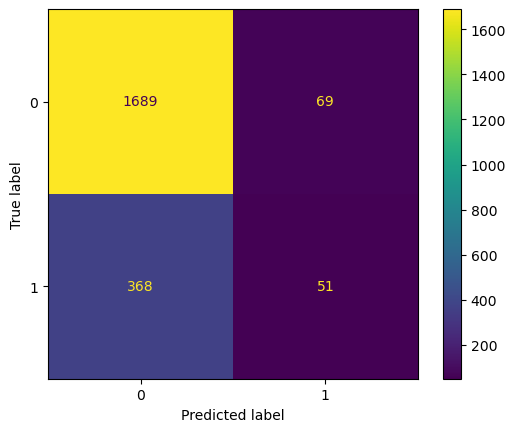

Accuracy: 0.799265043638034
F1 0.18923933209647495
              precision    recall  f1-score   support

       False       0.82      0.96      0.89      1758
        True       0.42      0.12      0.19       419

    accuracy                           0.80      2177
   macro avg       0.62      0.54      0.54      2177
weighted avg       0.74      0.80      0.75      2177

False    1758
True      419
Name: defects, dtype: int64
False    2057
True      120
dtype: int64


In [17]:
knn = KNeighborsClassifier(n_neighbors=10)
knn = knn.fit(X_train,y_train)

knn_model = knn.predict(X_test)
Y_knn = pd.DataFrame(knn_model, index = X_test.index)

print("Kneighbors")
print(confusion_matrix(y_test, Y_knn))
#fig, ax = plt.subplots(figsize=(8, 5))
cmp = ConfusionMatrixDisplay(confusion_matrix(y_test, Y_knn))
cmp.plot()
plt.show()
print("Accuracy:",accuracy_score(y_test, Y_knn))
print("F1",f1_score(y_test,Y_knn,pos_label=True))
print(classification_report(y_test, Y_knn))
print(y_test.value_counts())
print(Y_knn.value_counts())

#### RandomForestClassifier

Random Forest
[[1631  127]
 [ 323   96]]


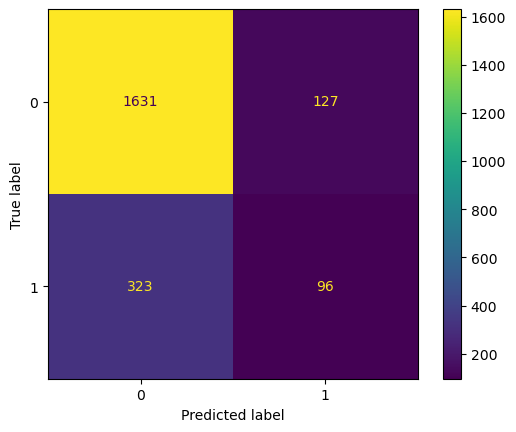

Accuracy score:  0.7932935231970601
F1 0.2990654205607477
              precision    recall  f1-score   support

       False       0.83      0.93      0.88      1758
        True       0.43      0.23      0.30       419

    accuracy                           0.79      2177
   macro avg       0.63      0.58      0.59      2177
weighted avg       0.76      0.79      0.77      2177

False    1758
True      419
Name: defects, dtype: int64
False    1954
True      223
dtype: int64


In [16]:
RF = RandomForestClassifier()
RF = RF.fit(X_train, y_train)
RF_model = RF.predict(X_test)
Y_RF = pd.DataFrame(RF_model, index = X_test.index)

print('Random Forest')
print(confusion_matrix(y_test, Y_RF))
#fig, ax = plt.subplots(figsize=(8, 5))
cmp = ConfusionMatrixDisplay(confusion_matrix(y_test, Y_RF))
cmp.plot()
plt.show()
print('Accuracy score: ', accuracy_score(y_test, Y_RF))
print("F1",f1_score(y_test,Y_RF,pos_label=True))

print(classification_report(y_test, Y_RF))
print(y_test.value_counts())
print(Y_RF.value_counts())

#### BaggingClassifier

Bagging
[[1623  135]
 [ 320   99]]


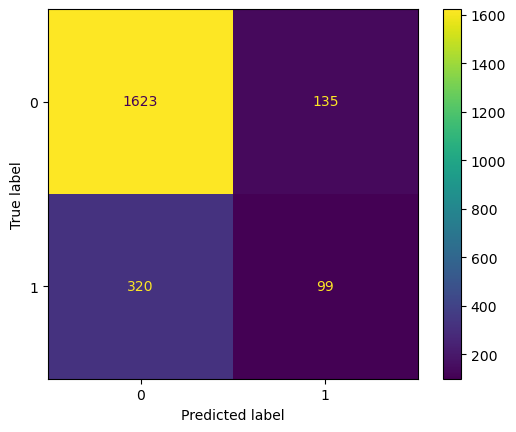

Accuracy score:  0.7909967845659164
F1 0.30321592649310875
              precision    recall  f1-score   support

       False       0.84      0.92      0.88      1758
        True       0.42      0.24      0.30       419

    accuracy                           0.79      2177
   macro avg       0.63      0.58      0.59      2177
weighted avg       0.76      0.79      0.77      2177

False    1758
True      419
Name: defects, dtype: int64
False    1943
True      234
dtype: int64


In [21]:
bgc = BaggingClassifier(base_estimator=DecisionTreeClassifier())
bgc = bgc.fit(X_train,y_train)
bgc_model = bgc.predict(X_test)
Y_bgc = pd.DataFrame(bgc_model, index = X_test.index)

print('Bagging')
print(confusion_matrix(y_test, Y_bgc))
#fig, ax = plt.subplots(figsize=(8, 5))
cmp = ConfusionMatrixDisplay(confusion_matrix(y_test, Y_bgc))
cmp.plot()
plt.show()
print('Accuracy score: ', accuracy_score(y_test, Y_bgc))
print("F1",f1_score(y_test,Y_bgc,pos_label=True))
print(classification_report(y_test, Y_bgc))
print(y_test.value_counts())
print(Y_bgc.value_counts())

#### AdaBoostClassifier

Bagging
[[1719   39]
 [ 382   37]]


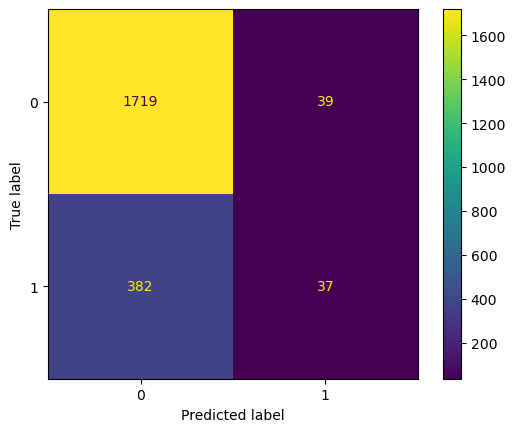

Accuracy score:  0.8066146072576941
F1 0.1494949494949495
              precision    recall  f1-score   support

       False       0.82      0.98      0.89      1758
        True       0.49      0.09      0.15       419

    accuracy                           0.81      2177
   macro avg       0.65      0.53      0.52      2177
weighted avg       0.75      0.81      0.75      2177

False    1758
True      419
Name: defects, dtype: int64
False    2101
True       76
dtype: int64


In [22]:
abc = AdaBoostClassifier()
abc = abc.fit(X_train,y_train)
abc_model = abc.predict(X_test)
Y_abc = pd.DataFrame(abc_model, index = X_test.index)

print('Bagging')
print(confusion_matrix(y_test, Y_abc))
#fig, ax = plt.subplots(figsize=(8, 5))
cmp = ConfusionMatrixDisplay(confusion_matrix(y_test, Y_abc))
cmp.plot()
plt.show()
print('Accuracy score: ', accuracy_score(y_test, Y_abc))
print("F1",f1_score(y_test,Y_abc,pos_label=True))
print(classification_report(y_test, Y_abc))
print(y_test.value_counts())
print(Y_abc.value_counts())

#### GradientBoostingClassifier

Gradient Boosting
[[1704   54]
 [ 379   40]]


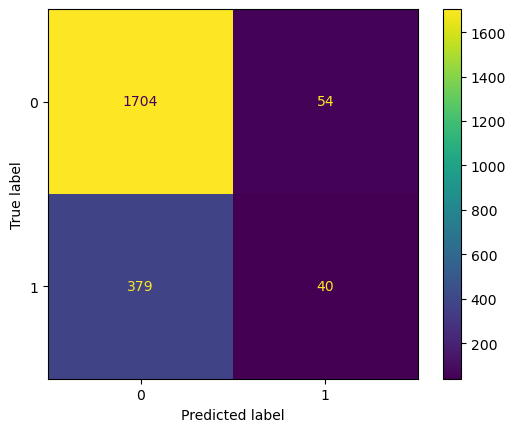

Accuracy score:  0.801102434542949
F1 0.15594541910331383
              precision    recall  f1-score   support

       False       0.82      0.97      0.89      1758
        True       0.43      0.10      0.16       419

    accuracy                           0.80      2177
   macro avg       0.62      0.53      0.52      2177
weighted avg       0.74      0.80      0.75      2177

False    1758
True      419
Name: defects, dtype: int64
False    2083
True       94
dtype: int64


In [23]:
GB = GradientBoostingClassifier()
GB = GB.fit(X_train, y_train)
GB_model = GB.predict(X_test)
Y_GB = pd.DataFrame(GB_model, index = X_test.index)

print('Gradient Boosting')
print(confusion_matrix(y_test, Y_GB))
cmp = ConfusionMatrixDisplay(confusion_matrix(y_test, Y_GB))
cmp.plot()
plt.show()    
print('Accuracy score: ', accuracy_score(y_test, Y_GB))
print("F1",f1_score(y_test,Y_GB,pos_label=True))
print(classification_report(y_test, Y_GB))
print(y_test.value_counts())
print(Y_GB.value_counts())

#### SVM

SVM
[[1744   14]
 [ 399   20]]


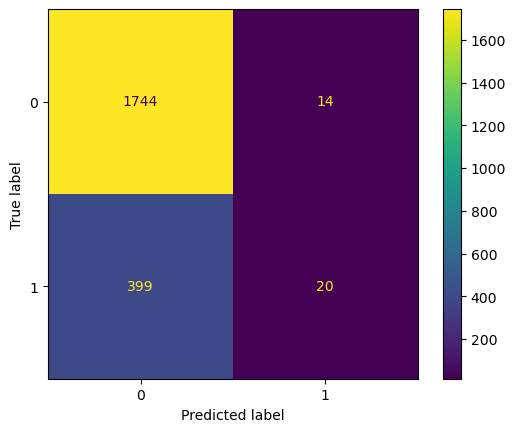

Accuracy score:  0.8102893890675241
F1 0.08830022075055188
              precision    recall  f1-score   support

       False       0.81      0.99      0.89      1758
        True       0.59      0.05      0.09       419

    accuracy                           0.81      2177
   macro avg       0.70      0.52      0.49      2177
weighted avg       0.77      0.81      0.74      2177

False    2143
True       34
dtype: int64


In [25]:
SVM = svm.SVC(kernel='rbf')
SVM = SVM.fit(X_train, y_train)
SVM_model = SVM.predict(X_test)
Y_SVM = pd.DataFrame(SVM_model, index=X_test.index)

print('SVM')
print(confusion_matrix(y_test, Y_SVM))
cmp = ConfusionMatrixDisplay(confusion_matrix(y_test, Y_SVM))
cmp.plot()
plt.show()
print('Accuracy score: ', accuracy_score(y_test, Y_SVM))
print("F1",f1_score(y_test,Y_SVM,pos_label=True))
print(classification_report(y_test, Y_SVM))
#print(y_test_HL.value_counts())
print(Y_SVM.value_counts())


*Desicion tree has best performance with F1 Score of 0.36*

## Predictions

### bounswe2022group8 Code Overall Metrics

<li>loc: 29092</li>
<li>v(g): 1574</li>
<li>lOCode: 23946</li>
<li>lOComment: 1386</li>
<li>lOBlank: 1376 </li>
<li>lOCodeAndComment: ??? </li>

#### Individual Analysis for bounswe2022group8

In [69]:
def predict_defect(metrics,name):
    print("loc:"+ str(metrics[0]))
    print("v(g):"+ str(metrics[1]))
    print("lOCode:"+ str(metrics[2]))
    print("lOComment:"+ str(metrics[3]))
    print("lOBlank:"+ str(metrics[4]))
    print("lOCodeAndComment:"+ str(metrics[5]))
    x_predict = pd.DataFrame(np.array(metrics).reshape(1,-1),columns=predictors)
    print("")
    if DT.predict(x_predict)[0]:
        print("Defect is expected for "+name)
    else:
        print("No defect is expected for "+name)

In [75]:
predict_defect([306,16,276,8,22,0],"profile.py");

loc:306
v(g):16
lOCode:276
lOComment:8
lOBlank:22
lOCodeAndComment:0

Defect is expected for profile.py


In [74]:
predict_defect([51,2,44,1,6,0],"user.py");

loc:51
v(g):2
lOCode:44
lOComment:1
lOBlank:6
lOCodeAndComment:0

No defect is expected for user.py


In [76]:
predict_defect([102,6,76,0,26,0],"serializers.py")

loc:102
v(g):6
lOCode:76
lOComment:0
lOBlank:26
lOCodeAndComment:0

No defect is expected for serializers.py


In [77]:
predict_defect([94,10,79,4,11,0],"ArtItemSelection.js")

loc:94
v(g):10
lOCode:79
lOComment:4
lOBlank:11
lOCodeAndComment:0

Defect is expected for ArtItemSelection.js


In [78]:
predict_defect([46,4,37,2,7,2],"models.py")

loc:46
v(g):4
lOCode:37
lOComment:2
lOBlank:7
lOCodeAndComment:2

Defect is expected for models.py
